In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data_train = pd.read_csv('./data//train.csv')
data_test = pd.read_csv('./data/test.csv')
print(data_train.shape)
data_train.head(1).transpose()

(3000, 24)


,0
id,1
Gender,Female
Customer Type,disloyal Customer
Age,22
Type of Travel,Business travel
Class,Eco
Flight Distance,1599
Seat comfort,3
Departure/Arrival time convenient,0
Food and drink,3


EDA 결과
- 데이터의 분포가 상대적으로 매우 적은 경우
  - 0 ~ 5 의 값을 가지는 feature('Leg room service', 'Inflight wifi service', 'Ease of Online booking') 의 0 값의 분포가 매우 적음
- 데이터 분포가 치우친 경우
  - Departure Delay in Minutes, Arrival Delay in Minutes


numeric feature = 숫자형 자료 -> Flight Distance 등의 숫자형 데이터.

ordinal feature = 순서형 자료 -> Seat comfort 등 (매우만족 > 만족 > 보통 > 불만족 > 매우불만족)의 설문순서를 가진 데이터.

categorical feature = 범주형 자료 -> 남자 / 여자 등 범주별로 나눠진 데이터.

In [3]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

## 데이터 정제

### 데이터 분포가 치우친 경우
- Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 그래프가 왼쪽으로 치우쳐져 있다는 점
- log 변환을 이용하여 치우쳐진 정도를 줄여보겠습니다 (치우쳐진 정도 = skewness, 왜도)

In [4]:
for xstr in numeric_feature:
    print(xstr, "Scew :", data_train[xstr].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 9.190139679910239
Arrival Delay in Minutes Scew : 8.887761727831762


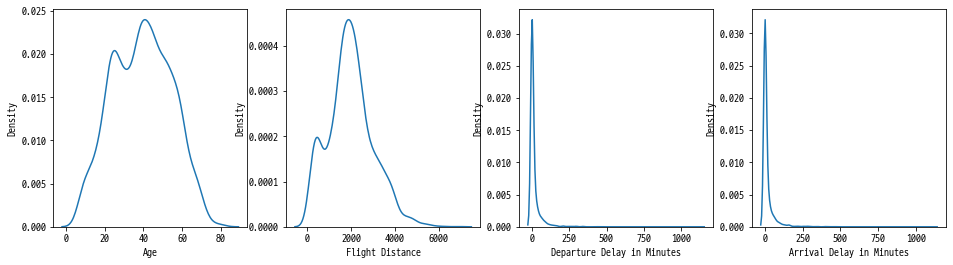

In [5]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))
for idx, f in enumerate(numeric_feature):
    sns.kdeplot(x = f, data = data_train, ax = ax[idx])

In [6]:
#log 변환 실행
data_train['Departure Delay in Minutes'] = np.log1p(data_train['Departure Delay in Minutes'])
data_train['Arrival Delay in Minutes'] = np.log1p(data_train['Arrival Delay in Minutes'])

#test 데이터에도 변환 실행
data_test['Departure Delay in Minutes'] = np.log1p(data_test['Departure Delay in Minutes'])
data_test['Arrival Delay in Minutes'] = np.log1p(data_test['Arrival Delay in Minutes'])

In [7]:
for f in numeric_feature:
    print(f, "Scew :", data_train[f].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 0.9302111175258293
Arrival Delay in Minutes Scew : 0.8979015577156512


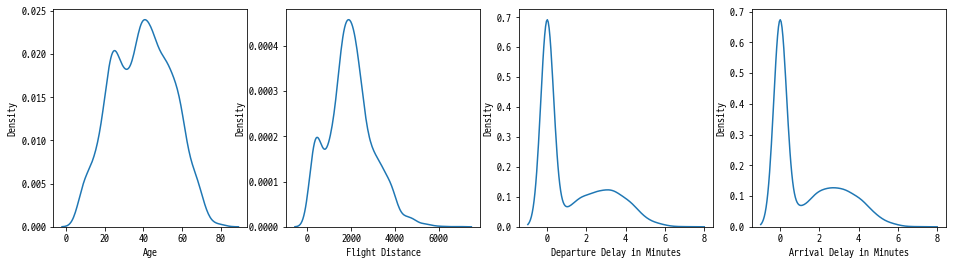

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))
for idx, f in enumerate(numeric_feature):
    sns.kdeplot(x = f, data = data_train, ax = ax[idx])

### 데이터의 분포가 상대적으로 매우 적은 경우

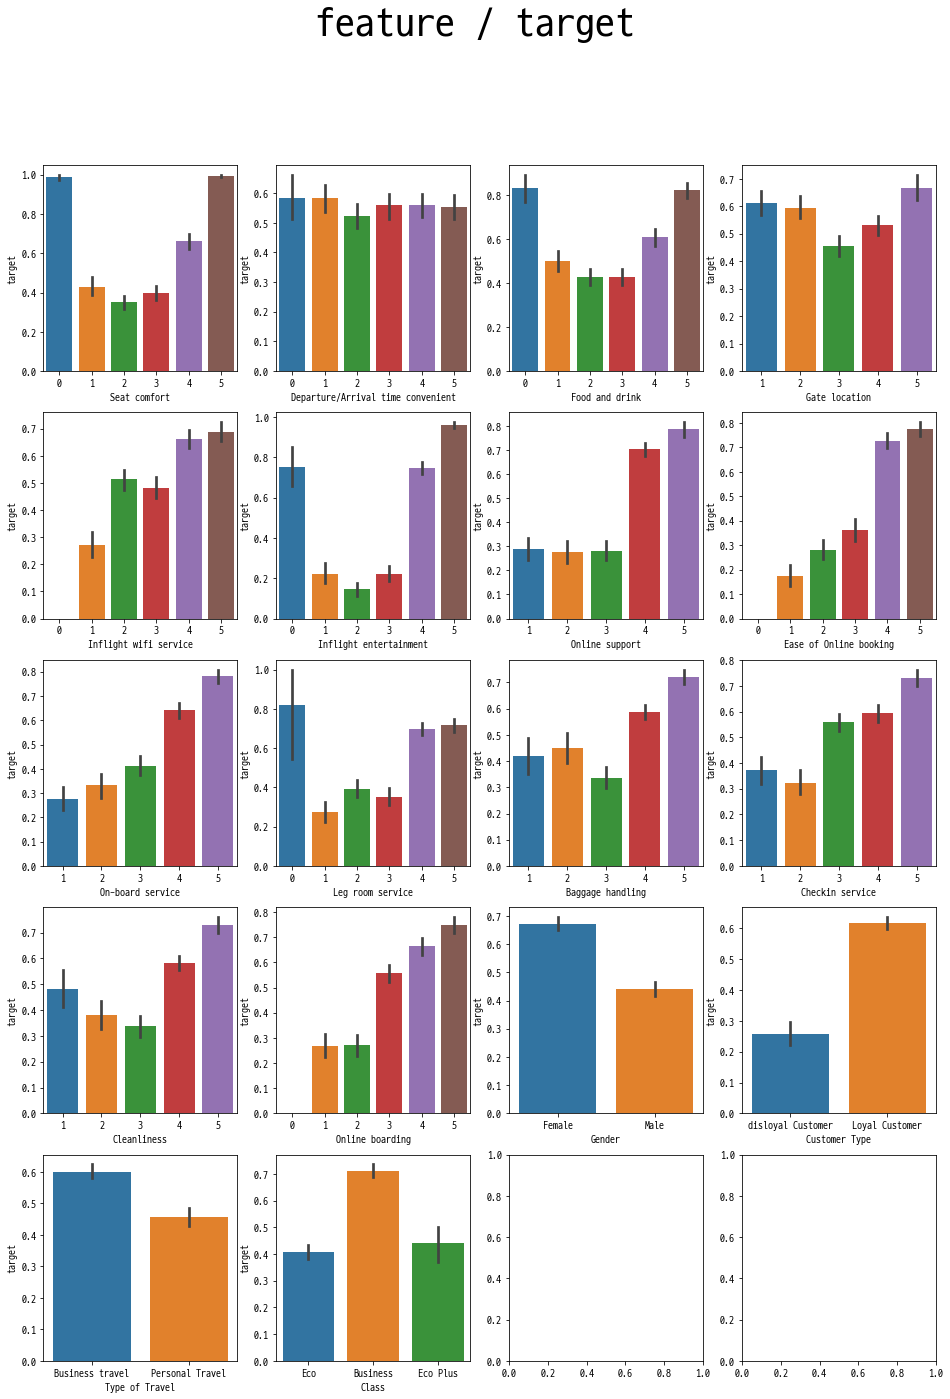

In [9]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

feature = ordinal_feature + categorical_feature

for idx, f in enumerate(feature):
    sns.barplot(x = f, y = 'target', data = data_train, ax = ax[idx//4][idx%4])

In [14]:
data_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [16]:
feature = ['Leg room service', 'Inflight wifi service', 'Ease of Online booking']
for f in feature:
    print(data_train[f].value_counts()[0])

11
2
1


#### 데이터 제거

In [24]:
data_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [31]:
feature = ['Leg room service', 'Inflight wifi service', 'Ease of Online booking']
print(len(data_train))
for f in feature:
    data_train = data_train[data_train[f] != 0]
print(len(data_train))

3000
2987


In [33]:
print(data_train['Leg room service'].unique())
print(data_train['Inflight wifi service'].unique())
print(data_train['Ease of Online booking'].unique())

[4 5 2 3 1]
[4 1 3 5 2]
[4 5 3 1 2]


## 데이터 생성
- 'Departure Delay in Minutes'와 'Arrival Delay in Minutes'의 상관관계가 매우 높으므로 2개의 항목을 묶어 지연된 경우 / 지연되지 않는 경우로 분리하고 나머지 기존 feature 제거

In [36]:
data_train[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr()

,Departure Delay in Minutes,Arrival Delay in Minutes
Departure Delay in Minutes,1.000000,0.816475
Arrival Delay in Minutes,0.816475,1.000000


In [37]:
# train data
data_train['Delay'] = data_train.apply(lambda x : 0 if x['Departure Delay in Minutes'] + x['Arrival Delay in Minutes'] > 0 else 1, axis = 1)
del data_train['Departure Delay in Minutes']
del data_train['Arrival Delay in Minutes']

data_test['Delay'] = data_test.apply(lambda x : 0 if x['Departure Delay in Minutes'] + x['Arrival Delay in Minutes'] > 0 else 1, axis = 1)
del data_test['Departure Delay in Minutes']
del data_test['Arrival Delay in Minutes']

## 데이터 제거
- https://dacon.io/competitions/official/235871/codeshare/4468?page=1&dtype=recent 성지코딩님의 다중공선성 부분을 참고함
- id - 학습에 관련없음
- Food and drink - Seat comfort와의 다중 공선성과 많은 결측치
- Departure/Arrival time convenient - 많은 결측치 및 target과의 낮은 상관계수

In [39]:
data_train.corr()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,target,Delay
id,1.000000,0.004559,0.011454,0.000843,0.010097,0.006466,-0.004446,0.011025,-0.006541,0.003000,0.022551,-0.016430,0.006794,0.039166,0.008499,0.010635,0.009505,0.007362,-0.006134
Age,0.004559,1.000000,-0.242480,0.010242,0.035750,0.014372,-0.001005,0.023230,0.111346,0.119010,0.082891,0.046559,0.098602,-0.014452,0.036786,-0.020113,0.042546,0.105547,0.014215
Flight Distance,0.011454,-0.242480,1.000000,-0.027118,0.006937,0.019545,0.016241,-0.010769,-0.037291,-0.049352,-0.033359,-0.031701,-0.017820,0.036627,-0.010466,0.014949,-0.011656,-0.050047,-0.044571
Seat comfort,0.000843,0.010242,-0.027118,1.000000,0.444711,0.724648,0.417355,0.148898,0.431630,0.127223,0.228396,0.122726,0.142280,0.106174,0.030650,0.098600,0.148531,0.276468,0.020010
Departure/Arrival time convenient,0.010097,0.035750,0.006937,0.444711,1.000000,0.523038,0.528353,0.007664,0.107683,0.016371,0.024570,0.074235,0.005617,0.059670,0.044269,0.065901,0.026604,-0.012526,-0.029744
Food and drink,0.006466,0.014372,0.019545,0.724648,0.523038,1.000000,0.521807,0.028460,0.375202,0.034701,0.081429,0.074754,0.075900,0.035921,0.009674,0.047486,0.046777,0.149826,-0.019393
Gate location,-0.004446,-0.001005,0.016241,0.417355,0.528353,0.521807,1.000000,0.010147,0.025424,0.030887,0.025945,0.007263,-0.023409,-0.003490,-0.040283,-0.007264,0.038119,0.002605,-0.012813
Inflight wifi service,0.011025,0.023230,-0.010769,0.148898,0.007664,0.028460,0.010147,1.000000,0.272737,0.564295,0.602954,0.073773,0.047285,0.039511,0.086560,0.024232,0.631253,0.241461,0.065690
Inflight entertainment,-0.006541,0.111346,-0.037291,0.431630,0.107683,0.375202,0.025424,0.272737,1.000000,0.423056,0.335913,0.184802,0.169176,0.105528,0.210079,0.076855,0.353059,0.521806,0.039940
Online support,0.003000,0.119010,-0.049352,0.127223,0.016371,0.034701,0.030887,0.564295,0.423056,1.000000,0.623799,0.166803,0.161398,0.080844,0.211425,0.075419,0.676166,0.411176,0.056091


In [40]:
corr_matrix = data_train.corr()
corr_matrix["target"].sort_values(ascending=False)

target                               1.000000
Inflight entertainment               0.521806
Ease of Online booking               0.449010
Online support                       0.411176
On-board service                     0.361151
Online boarding                      0.351127
Leg room service                     0.321589
Seat comfort                         0.276468
Checkin service                      0.248750
Inflight wifi service                0.241461
Cleanliness                          0.235535
Baggage handling                     0.234366
Food and drink                       0.149826
Age                                  0.105547
Delay                                0.096444
id                                   0.007362
Gate location                        0.002605
Departure/Arrival time convenient   -0.012526
Flight Distance                     -0.050047
Name: target, dtype: float64

In [41]:
data_train = data_train.drop(['Food and drink', 'Departure/Arrival time convenient', 'id'], axis = 1)
data_test = data_test.drop(['Food and drink', 'Departure/Arrival time convenient', 'id'], axis = 1)

## 모델 학습
- pycaret 활용

In [42]:
from pycaret.classification import *
reg = setup(data = data_train,
            silent = True,
            target = 'target',
            session_id = 0,
            n_jobs = 7)

,Description,Value
0,session_id,0
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2987, 20)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
best = compare_models(n_select=3, fold = 10) #상위 모델 3개를 선택합니다

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9244,0.9778,0.9221,0.9378,0.9295,0.8480,0.8490,0.1780
gbc,Gradient Boosting Classifier,0.9110,0.9705,0.9080,0.9268,0.9170,0.8211,0.8219,0.1000
et,Extra Trees Classifier,0.9096,0.9694,0.9071,0.9248,0.9155,0.8183,0.8191,0.0860
rf,Random Forest Classifier,0.9029,0.9686,0.9053,0.9148,0.9096,0.8046,0.8056,0.0870
lr,Logistic Regression,0.8833,0.9544,0.8867,0.8968,0.8913,0.7652,0.7662,0.5530
ada,Ada Boost Classifier,0.8809,0.9500,0.8814,0.8969,0.8887,0.7606,0.7615,0.0610
dt,Decision Tree Classifier,0.8789,0.8782,0.8876,0.8889,0.8876,0.7564,0.7576,0.0090
lda,Linear Discriminant Analysis,0.8789,0.9521,0.8823,0.8935,0.8873,0.7565,0.7577,0.0100
ridge,Ridge Classifier,0.8780,0.0000,0.8814,0.8926,0.8864,0.7546,0.7558,0.0070
nb,Naive Bayes,0.8483,0.9281,0.8212,0.8903,0.8540,0.6967,0.6998,0.0060


In [44]:
blend_3_soft = blend_models(estimator_list=best, method='soft', choose_better = True)
predict_model(blend_3_soft).head(10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9871,0.9558,0.9474,0.9515,0.8940,0.8940
1,0.9139,0.9782,0.9292,0.9130,0.9211,0.8263,0.8265
2,0.9234,0.9787,0.9204,0.9369,0.9286,0.8461,0.8463
3,0.8995,0.9702,0.8938,0.9182,0.9058,0.7982,0.7985
4,0.9187,0.9793,0.9204,0.9286,0.9244,0.8364,0.8364
5,0.9378,0.9766,0.9292,0.9545,0.9417,0.8751,0.8754
6,0.9139,0.9783,0.9027,0.9358,0.9189,0.8271,0.8278
7,0.9330,0.9665,0.8938,0.9806,0.9352,0.8662,0.8702
8,0.9187,0.9735,0.9292,0.9211,0.9251,0.8361,0.8361
9,0.9139,0.9785,0.9292,0.9130,0.9211,0.8263,0.8265


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9454,0.9871,0.9471,0.9598,0.9534,0.8874,0.8876


,Age,Flight Distance,Gender_Female,Customer Type_disloyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Seat comfort_0,Seat comfort_1,...,Cleanliness_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Delay_0,target,Label,Score
0,36.0,1871.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9206
1,9.0,1678.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9971
2,38.0,2231.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.9998
3,55.0,1579.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9576
4,37.0,1930.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9972
5,50.0,988.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9972
6,20.0,2767.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9965
7,34.0,1646.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9740
8,47.0,2049.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.9826
9,52.0,676.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9996


In [45]:
blend_3_soft = finalize_model(blend_3_soft)
prediction = predict_model(blend_3_soft, data = data_test)

In [46]:
print(prediction["Label"])

0       1
1       0
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Label, Length: 2000, dtype: int32


In [48]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [49]:
submission['target'] = prediction['Label']
submission.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [50]:
submission.to_csv("./result/blend_3_soft_test.csv",index=False)